In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/vijes/Downloads/taxi_trip_pricing.csv")
data

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [3]:
data.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [4]:
data = data[["Trip_Distance_km", "Passenger_Count", "Base_Fare", "Per_Minute_Rate", "Trip_Duration_Minutes", "Trip_Price"]]
data = data.fillna(data.mean(numeric_only=True))
data.isnull().sum()

Trip_Distance_km         0
Passenger_Count          0
Base_Fare                0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [5]:
x = data[["Trip_Distance_km", "Passenger_Count", "Base_Fare", "Per_Minute_Rate", "Trip_Duration_Minutes"]]
y = data[["Trip_Price"]]
from sklearn.preprocessing import StandardScaler
# Feature scaling (to prevent divergence)
scaler = StandardScaler()
x = scaler.fit_transform(data[["Trip_Distance_km", "Passenger_Count", "Base_Fare", "Per_Minute_Rate", "Trip_Duration_Minutes"]])
x = np.array(x)
y = np.array(y)

In [6]:
b_0, b_1, b_2, b_3, b_4, b_5, a = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001
len(x[:,0])

1000

In [7]:
m = len(y)

In [8]:
for _ in range(10000):
    y_pred = b_0 + b_1*x[:,0] + b_2*x[:,1] + b_3*x[:,2] +b_4*x[:,3] + b_5*x[:,4]
    db_0 = (1/m) * np.sum(y_pred - y[:,0])
    db_1 = (1/m) * np.sum((y_pred - y[:,0]) * x[:, 0])
    db_2 = (1/m) * np.sum((y_pred - y[:,0]) * x[:, 1])
    db_3 = (1/m) * np.sum((y_pred - y[:,0])* x[:, 2])
    db_4 = (1/m) * np.sum((y_pred - y[:,0])* x[:, 3])
    db_5 = (1/m) * np.sum((y_pred - y[:,0]) * x[:, 4])
    b_0 -= a * db_0
    b_1 -= a * db_1
    b_2 -= a * db_2
    b_3 -= a * db_3
    b_4 -= a * db_4
    b_5 -= a * db_5

In [9]:
y_pred

array([ 43.01200465,  92.1927954 ,  57.30196689,  71.68199305,
        46.68256208,  43.13539146,   1.09482917,  81.44627337,
        79.55555872,  80.98893468,  54.13676105, 110.87471056,
        80.05561551,  29.3626122 ,  23.40351563,  27.98423192,
        50.1471097 ,  66.87088806,  53.9485202 ,  27.43419472,
        59.26278359,  22.86725925, 181.23863019,  45.0890031 ,
        49.33209379,  64.15420918,  29.73711765, 257.9026759 ,
        71.00269248,  15.43765433,  67.65264318,   1.26513611,
        13.68255912, 102.39283816, 102.07490235,  77.60159706,
        31.83925282,  32.25952474,  67.2238982 ,  61.40564422,
        18.76351463,  50.30383115,  29.58023475, 105.30737456,
        24.34580131,  58.16872218,  54.09915488,  46.35100643,
        61.35860216,  18.23423576, 118.26197126,  61.67792676,
       101.10722846,  83.53305662,  61.97612158,  96.05905349,
        -1.76245383,  33.01353328,  26.54776074,  58.30489471,
        38.61628792,  53.82936704,  73.88007789,  61.25

In [10]:
from sklearn.metrics import r2_score
# Calculate R-squared score
r2 = r2_score(y, y_pred)
print("R² Score:", r2)

R² Score: 0.7673286664212852


In [11]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 362.01652710700375


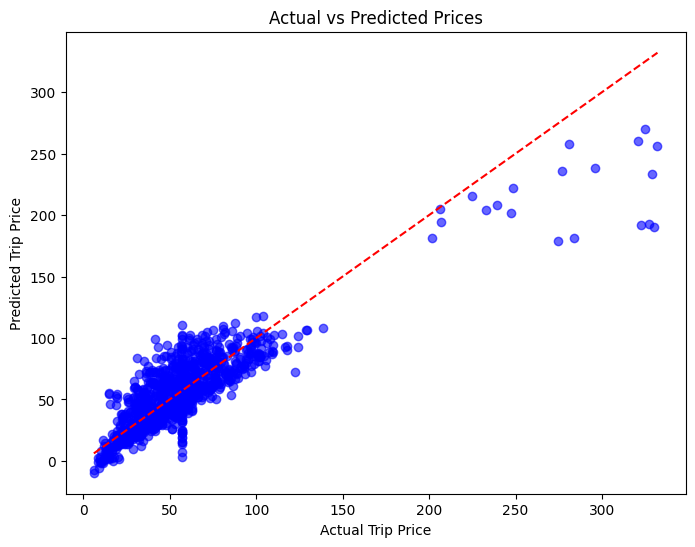

In [12]:
# Plot Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Trip Price")
plt.ylabel("Predicted Trip Price")
plt.title("Actual vs Predicted Prices")

# Perfect Prediction Line
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle="dashed")

plt.show()